In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import os
import math
from scipy.stats import norm, binom
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf

from pypfopt import EfficientFrontier, risk_models, expected_returns, objective_functions, base_optimizer, black_litterman, discrete_allocation
from pandas_datareader.data import DataReader

top_30 = ['SYNA', 'MRVL', 'SGH', 'ENPH', 'JBL', 'CRUS', 'MCHP', 'AEIS', 'MTSI', 'AMAT', 
          'NVDA', 'ON', 'TTMI', 'SMTC', 'AVGO', 'XLNX', 'TSM', 'IIVI', 'QCOM', 'NXPI', 'FLEX',
          'DIOD', 'AMD', 'MXL', 'ADI', 'INTC', 'TXN', 'LRCX', 'MU', 'OLED']

# Q1

In [3]:
#Tickers and weights taken from mid term report 

tickers =['ADI','AEIS' ,'AMAT' ,'AMD' ,'AVGO' ,'CRUS' ,'DIOD','ENPH','FLEX','IIVI','INTC','JBL','LRCX','MCHP','MRVL','MTSI','MU','MXL','NVDA','NXPI','OLED','ON','QCOM','SGH','SMTC','SYNA','TSM','TTMI','TXN','XLNX','RF']
original_best_fund = pd.read_csv("best_fund_original.csv")
original_worst_fund = pd.read_csv("worst_fund_original.csv") 
original_worst_fund.drop(original_worst_fund.tail(1).index,inplace=True) #drop cash 
weights_optimised = [0.026704,0.059727,0.009675,0.154568,0.009476,0.000071,0.029709,0.031739,0.083856,0.024400,0.105450,0.024077,0.010791,0.021304,0.021667,0.010913,0.023116,0.067754,0.025232,0.017685,0.009414,0.023142,0.036448,0.039288,0.019285,0.013199,0.013870,0.053220,0.017962,0.000000,0.016258]
weights_adjusted =  [0.0117,0.0521,0.1054,0.0000,0.0346,0.0000,0.0183,0.1354,0.0365,0.0235,0.0000,0.0510,0.0602,0.0363,0.0125,0.0522,0.0346,0.0310,0.0012,0.0463,0.0000,0.0896,0.0000,0.0244,0.0061,0.0468,0.0528,0.0015,0.0359,0.0000,0.0000]
weights_worst = list(original_worst_fund['Security\'s Percentage of the Total Net Assets']/100)
weights_best = list(original_best_fund['Security\'s Percentage of the Total Net Assets']/100)

## Question 1a part 1

In [4]:
def cal_ytd_returns(tickers, data):
    ytd_returns=[]
    for ticker in tickers:
        ytd_return = (data[ticker].iloc[-1] - data[ticker].iloc[0])/data[ticker].iloc[-1]
        ytd_returns.append(ytd_return)
                      
    return ytd_returns

### i. Best Mutual Fund

In [5]:
original_best_fund.sort_values(by='Ticker Symbol Given by the Exchange', inplace=True)
original_best_fund.reset_index(drop=True, inplace=True)
original_best_fund

Ticker Symbol Given by the Exchange  \
0                                  ADI   
1                                 AEIS   
2                                 AMAT   
3                                 AMBA   
4                                  AMD   
5                                 AOSL   
6                                  ASX   
7                                 AVGO   
8                                 CRUS   
9                                 DIOD   
10                                ENPH   
11                                FLEX   
12                                IIVI   
13                                INTC   
14                                 JBL   
15                                LRCX   
16                                MCHP   
17                                MRVL   
18                                MTSI   
19                                  MU   
20                                 MXL   
21                                NVDA   
22                                NXPI   
23                                OLED   
24                                  ON   
25                                QCOM   
26                                SEDG   
27                                 SGH   
28                                SMTC   
29                                SYNA   
30                                 TSM   
31                                TTMI   
32                                 TXN   
33                                XLNX   

    Security's Percentage of the Total Net Assets  \
0                                        1.299999   
1                                        0.730000   
2                                        2.129999   
3                                        0.180000   
4                                        5.289997   
5                                        0.340000   
6                                        0.160000   
7                                        4.689999   
8                                        2.080000   
9                                        0.910000   
10                                       2.839998   
11                                       0.660000   
12                                       0.960000   
13                                       3.839998   
14                                       1.400000   
15                                       4.589996   
16                                       4.779999   
17                                       5.369999   
18                                       0.680000   
19                                       5.820000   
20                                       0.600000   
21                                      19.019989   
22                                       6.079998   
23                                       1.179999   
24                                       4.289997   
25                                       6.719997   
26                                       0.300000   
27                                       0.460000   
28                                       0.520000   
29                                       0.490000   
30                                       1.110000   
31                                       0.670000   
32                                       2.839998   
33                                       4.639999   

    Number of the Security's Shares  \
0                            455296   
1                            388464   
2                           1282500   
3                            101700   
4                           2994500   
5                            742296   
6                           1396600   
7                            555550   
8                           1311560   
9                            667300   
10                           839200   
11                          1908900   
12                           653400   
13                          4004542   
14                          1705858   
15                           504973   
16           

In [6]:
#finding ytd returns for original portfolio
tickers_best_ori = original_best_fund['Ticker Symbol Given by the Exchange']
price_data_best = yf.download(list(tickers_best_ori),start = '2021-01-01',end = '2021-10-31')
price_data_best_ori = price_data_best['Adj Close'] 

[*********************100%***********************]  34 of 34 completed


In [7]:
ytd_best = pd.DataFrame(tickers_best_ori)
ytd_best['ytd_returns']=cal_ytd_returns(tickers_best_ori, price_data_best_ori)
ytd_best['weights'] = original_best_fund['Security\'s Percentage of the Total Net Assets']/100 
ytd_best['weighted_ytd_returns'] = ytd_best['ytd_returns']*ytd_best['weights']

In [8]:
q1a_results = pd.DataFrame(columns=['portfolio', 'ytd returns', 'annualised volatility'])
q1a_results.loc[0] = (['best mutual fund',ytd_best['weighted_ytd_returns'].sum()*100, 0])
q1a_results

portfolio  ytd returns annualised volatility
0  best mutual fund    19.803785                     0

### ii. Worst Mutual Fund

In [9]:
original_worst_fund.sort_values(by='Ticker Symbol Given by the Exchange', inplace=True)
original_worst_fund.reset_index(drop=True, inplace=True)
original_worst_fund

Ticker Symbol Given by the Exchange  \
0                                 AAPL   
1                                 ABBV   
2                                 ADBE   
3                                  ADP   
4                                 ADSK   
5                                 AMZN   
6                                 ANTM   
7                                  BAH   
8                                 EBIX   
9                                 EEFT   
10                                 ENS   
11                                EPAM   
12                                EXTR   
13                                   G   
14                                GOOG   
15                                 GPN   
16                                IIVI   
17                                 IQV   
18                                 JBL   
19                                  MA   
20                                MSFT   
21                                NXPI   
22                                PRFT   
23                                QRVO   
24                                 ROG   
25                                  ST   
26                                SWKS   
27                                 TEL   
28                                 THR   
29                                 UNH   
30                                   V   

    Security's Percentage of the Total Net Assets  \
0                                        6.669998   
1                                        3.000000   
2                                        3.859999   
3                                        1.740000   
4                                        4.160000   
5                                        2.539999   
6                                        2.279999   
7                                        2.109999   
8                                        4.219997   
9                                        4.269997   
10                                       1.900000   
11                                       4.299999   
12                                       4.219997   
13                                       0.480000   
14                                       2.049999   
15                                       5.070000   
16                                       4.730000   
17                                       1.469999   
18                                       1.740000   
19                                       4.149998   
20                                       6.289997   
21                                       3.429998   
22                                       3.039999   
23                                       2.839998   
24                                       2.900000   
25                                       2.049999   
26                                       3.929998   
27                                       0.850000   
28                                       1.870000   
29                                       4.349998   
30                                       3.000000   

    Number of the Security's Shares  \
0                           64500.0   
1                           35965.0   
2                            9900.0   
3                           12700.0   
4                           17500.0   
5                            1000.0   
6                            9100.0   
7                           31000.0   
8                          142500.0   
9                           37800.0   
10                          29300.0   
11                          15400.0   
12                         786057.0   
13                          14900.0   
14                           1500.0   
15                          30193.0   
16                          79900.0   
17                          10538.0   
18                          52400.0   
19                          14900.0   
20                          36300.0   
21                          27687.0   
22                          81900.0   
23                       

In [11]:
#finding ytd returns for original portfolio
tickers_worst_ori = original_worst_fund['Ticker Symbol Given by the Exchange']
price_data_worst_ori = yf.download(list(tickers_worst_ori),start = '2021-01-01',end = '2021-10-31')
price_data_worst_ori = price_data_worst_ori['Adj Close']   
price_data_worst_ori

[*********************100%***********************]  31 of 31 completed


AAPL        ABBV        ADBE         ADP        ADSK  \
Date                                                                     
2020-12-31  131.877014  102.245750  500.119995  173.686356  305.339996   
2021-01-04  128.617096  100.585396  485.339996  166.549637  296.839996   
2021-01-05  130.207306  101.625504  485.690002  166.086349  301.700012   
2021-01-06  125.824318  100.747620  466.309998  165.504761  302.869995   
2021-01-07  130.117859  101.825897  477.739990  166.441208  315.200012   
...                ...         ...         ...         ...         ...   
2021-10-25  148.423386  108.500000  646.969971  218.070007  311.790009   
2021-10-26  149.102402  109.489998  642.500000  218.800003  312.799988   
2021-10-27  148.633087  108.400002  640.080017  221.949997  308.510010   
2021-10-28  152.347656  109.669998  639.280029  222.940002  317.100006   
2021-10-29  149.581696  114.669998  650.359985  224.490005  317.609985   

                   AMZN        ANTM        BAH       EBIX        EEFT  ...  \
Date                                                                   ...   
2020-12-31  3256.929932  318.126770  85.678612  37.651852  144.919998  ...   
2021-01-04  3186.629883  315.639923  84.499275  37.265121  140.649994  ...   
2021-01-05  3218.510010  312.192047  85.167564  37.879925  144.850006  ...   
2021-01-06  3138.379883  325.290070  87.162605  39.972244  146.369995  ...   
2021-01-07  3162.159912  334.266418  89.285408  39.992077  147.580002  ...   
...                 ...         ...        ...        ...         ...  ...   
2021-10-25  3320.370117  434.559998  83.311226  31.790001  122.529999  ...   
2021-10-26  3376.070068  436.239990  82.295471  31.760000  117.900002  ...   
2021-10-27  3392.489990  433.679993  79.357773  30.809999  114.059998  ...   
2021-10-28  3446.570068  433.359985  80.224144  31.969999  114.099998  ...   
2021-10-29  3372.429932  435.130005  86.497879  32.810001  112.190002  ...   

                  NXPI        PRFT        QRVO         ROG         ST  \
Date                                                                    
2020-12-31  157.676880   47.650002  166.270004  155.289993  52.740002   
2021-01-04  160.681473   46.450001  164.589996  152.089996  51.970001   
2021-01-05  164.281052   46.910000  169.250000  156.350006  53.419998   
2021-01-06  167.305481   48.450001  172.000000  169.699997  55.470001   
2021-01-07  173.522903   48.980000  178.570007  176.589996  56.119999   
...                ...         ...         ...         ...        ...   
2021-10-25  200.289993  124.709999  167.320007  194.979996  56.700001   
2021-10-26  196.149994  123.190002  165.279999  194.320007  56.119999   
2021-10-27  192.410004  121.900002  165.270004  192.199997  54.770000   
2021-10-28  199.899994  124.790001  168.929993  199.639999  55.160000   
2021-10-29  200.860001  123.599998  168.229996  201.119995  55.099998   

                  SWKS         TEL        THR         UNH           V  
Date                                                                   
2020-12-31  151.550064  119.765152  15.630000  346.945587  217.394592  
2021-01-04  149.408844  119.003464  15.540000  345.778137  216.430527  
2021-01-05  154.940308  121.288551  16.030001  341.128174  213.200363  
2021-01-06  157.111252  124.770615  16.980000  355.444122  211.321899  
2021-01-07  161.264801  127.273346  17.809999  361.142761  212.504623  
...                ...         ...        ...         ...         ...  
2021-10-25  165.179993  147.690002  17.030001  449.489990  233.469009  
2021-10-26  164.330002  146.910004  16.980000  454.640015  231.412628  
2021-10-27  165.899994  142.839996  16.610001  453.480011  215.400803  
2021-10-28  169.839996  145.179993  17.010000  455.440002  209.471237  
2021-10-29  167.130005  146.000000  17.280001  460.470001  211.397858  

[210 rows x 31 columns]

In [12]:
ytd_worst = pd.DataFrame(tickers_worst_ori)
ytd_worst['ytd_returns']=cal_ytd_returns(tickers_worst_ori, price_data_worst_ori)
ytd_worst['weights'] = original_worst_fund['Security\'s Percentage of the Total Net Assets']/100 
ytd_worst['weighted_ytd_returns'] = ytd_worst['ytd_returns']*ytd_worst['weights']

In [13]:
ytd_worst['weighted_ytd_returns'].sum()

0.09696551851031274

In [14]:
q1a_results.loc[1] = (['worst mutual fund',ytd_worst['weighted_ytd_returns'].sum()*100, 0])
q1a_results

portfolio  ytd returns annualised volatility
0   best mutual fund    19.803785                     0
1  worst mutual fund     9.696552                     0

### iii. portfolio before subjective adjustment

In [15]:
price_data = yf.download(tickers,start = '2021-01-01',end = '2021-10-31')

[*********************100%***********************]  31 of 31 completed


In [16]:
price_data = price_data['Adj Close']
print(price_data.head(5))

                   ADI        AEIS       AMAT        AMD        AVGO  \
Date                                                                   
2020-12-31  145.864197   96.663727  85.829170  91.709999  427.943359   
2021-01-04  144.175812   97.680496  86.396065  92.300003  415.599121   
2021-01-05  146.752838  101.538284  89.111160  92.769997  418.413971   
2021-01-06  147.414368  105.924385  90.334457  90.330002  415.833679   
2021-01-07  153.644699  111.177742  94.044098  95.160004  433.358032   

                 CRUS       DIOD        ENPH       FLEX       IIVI  ...  \
Date                                                                ...   
2020-12-31  82.199997  70.500000  175.470001  17.980000  75.959999  ...   
2021-01-04  84.129997  71.239998  172.240005  17.879999  76.010002  ...   
2021-01-05  86.360001  74.019997  181.479996  17.820000  79.089996  ...   
2021-01-06  90.379997  77.360001  203.380005  18.670000  79.389999  ...   
2021-01-07  91.360001  79.089996  213.759995 

In [17]:
#to get ytd returns for optimised portfolio 
ytd_optimised = pd.DataFrame(tickers)
ytd_optimised['ytd_returns']=cal_ytd_returns(tickers, price_data)
ytd_optimised['weights'] = weights_optimised
ytd_optimised['weighted_ytd_returns'] = ytd_optimised['ytd_returns']*ytd_optimised['weights']

In [18]:
q1a_results.loc[2] = (['portfolio before subjective adjustment',ytd_optimised['weighted_ytd_returns'].sum()*100, 0])
q1a_results

portfolio  ytd returns annualised volatility
0                        best mutual fund    19.803785                     0
1                       worst mutual fund     9.696552                     0
2  portfolio before subjective adjustment    13.585535                     0

## Question 1a part 2

In [19]:
def cal_annualised_sd(df, weights):
    return_stocks = df.pct_change()
    daily_returns_portfolio_mean = return_stocks.mean()
    
    allocated_daily_returns = (weights * daily_returns_portfolio_mean)
    portfolio_return = np.sum(allocated_daily_returns)
    
    return_stocks['portfolio_daily_returns'] = return_stocks.dot(weights)
                                                                
    matrix_covariance_portfolio = return_stocks.iloc[:,:-1]
    matrix_covariance_portfolio = (matrix_covariance_portfolio.cov())*252
    
    portfolio_variance = np.dot(np.array(weights).T,np.dot(matrix_covariance_portfolio, weights))

    portfolio_risk = np.sqrt(portfolio_variance)
    return portfolio_risk*100

### i. Best Mutual Fund

In [20]:
portfolio_volatility_i = cal_annualised_sd(price_data_best_ori, weights_best)

### ii. Worst Mutual Fund

In [21]:
portfolio_volatility_ii = cal_annualised_sd(price_data_worst_ori, weights_worst)

### iii. portfolio before subjective adjustment

In [22]:
portfolio_volatility_iii = cal_annualised_sd(price_data, weights_optimised)

In [24]:
vol = [portfolio_volatility_i, portfolio_volatility_ii, portfolio_volatility_iii]

q1a_results['annualised volatility'] = vol
q1a_results

portfolio  ytd returns  annualised volatility
0                        best mutual fund    19.803785              30.716611
1                       worst mutual fund     9.696552              17.141647
2  portfolio before subjective adjustment    13.585535              29.148170

## Question 1b 

### (i) best mutual fund

In [25]:
#finding ytd returns for original portfolio
tickers_best_ori = original_best_fund['Ticker Symbol Given by the Exchange']
price_data_best_1b = yf.download(list(tickers_best_ori),start = '2021-10-01',end = '2021-10-31')
price_data_best_ori_1b = price_data_best_1b['Adj Close']   

[*********************100%***********************]  34 of 34 completed


In [26]:
monthly_best = pd.DataFrame(tickers_best_ori)
monthly_best['monthly_returns']=cal_ytd_returns(tickers_best_ori, price_data_best_ori_1b)
monthly_best['weights'] = weights_best
monthly_best['weighted_monthly_returns'] = monthly_best['monthly_returns']*monthly_best['weights']

q1b_results = pd.DataFrame(columns=['portfolio', 'total monthly returns'])
q1b_results.loc[0] = (['best mutual fund',monthly_best['weighted_monthly_returns'].sum()*100])
q1b_results

portfolio  total monthly returns
0  best mutual fund               5.815515

In [27]:
#finding ytd returns for original portfolio
tickers_worst_ori = original_worst_fund['Ticker Symbol Given by the Exchange']
price_data_worst_1b = yf.download(list(tickers_worst_ori),start = '2021-10-01',end = '2021-10-31')
price_data_worst_ori_1b = price_data_worst_1b['Adj Close'] 

[*********************100%***********************]  31 of 31 completed


In [28]:
monthly_worst = pd.DataFrame(tickers_worst_ori)
monthly_worst['monthly_returns']=cal_ytd_returns(tickers_worst_ori, price_data_worst_ori_1b)
monthly_worst['weights'] = weights_worst
monthly_worst['weighted_monthly_returns'] = monthly_worst['monthly_returns']*monthly_worst['weights']

q1b_results.loc[1] = (['worst mutual fund',monthly_worst['weighted_monthly_returns'].sum()*100])
q1b_results

portfolio  total monthly returns
0   best mutual fund               5.815515
1  worst mutual fund               5.859496

### (iii) portfolio before subjective adjustment

In [29]:
price_data_opt = yf.download(tickers,start = '2021-10-01',end = '2021-10-31')
price_data_opt = price_data_opt['Adj Close']

[*********************100%***********************]  31 of 31 completed


In [30]:
monthly_opt = pd.DataFrame(tickers_worst_ori)
monthly_opt['monthly_returns']=cal_ytd_returns(tickers, price_data_opt)
monthly_opt['weights'] = weights_optimised
monthly_opt['weighted_monthly_returns'] = monthly_opt['monthly_returns']*monthly_opt['weights']

q1b_results.loc[2] = (['portfolio before subjective adjustment',monthly_opt['weighted_monthly_returns'].sum()*100])
q1b_results

portfolio  total monthly returns
0                        best mutual fund               5.815515
1                       worst mutual fund               5.859496
2  portfolio before subjective adjustment               6.632408

### (iiii) portfolio after subjective adjustment

In [31]:
monthly_opt = pd.DataFrame(tickers_worst_ori)
monthly_opt['monthly_returns']=cal_ytd_returns(tickers, price_data_opt)
monthly_opt['weights'] = weights_adjusted
monthly_opt['weighted_monthly_returns'] = monthly_opt['monthly_returns']*monthly_opt['weights']

q1b_results.loc[3] = (['portfolio after subjective adjustment',monthly_opt['weighted_monthly_returns'].sum()*100])
q1b_results

portfolio  total monthly returns
0                        best mutual fund               5.815515
1                       worst mutual fund               5.859496
2  portfolio before subjective adjustment               6.632408
3   portfolio after subjective adjustment               8.407291

The adjusted portfolio had a significant improved (and the best) total monthly returns compared to the best mutual fund's original portfolio and portfolio before subjective adjustment for the month of October 2021. 


In [32]:
price_data_best_ori['date'] = price_data_best_ori.index

In [33]:
price_data_best_ori
df = price_data_best_ori[['ASX', 'date']]

In [34]:
price_data_best_ori['date2'] = price_data_best_ori['date'].dt.strftime('%Y-%m')

In [35]:
price_data_best_ori

ADI        AEIS        AMAT        AMBA         AMD  \
Date                                                                     
2020-12-31  145.864197   96.663727   85.829178   91.820000   91.709999   
2021-01-04  144.175812   97.680496   86.396057   91.339996   92.300003   
2021-01-05  146.752838  101.538277   89.111160   95.250000   92.769997   
2021-01-06  147.414368  105.924377   90.334457  102.650002   90.330002   
2021-01-07  153.644684  111.177734   94.044098  106.410004   95.160004   
...                ...         ...         ...         ...         ...   
2021-10-25  180.520004   85.820000  135.759995  179.850006  122.360001   
2021-10-26  179.880005   85.279999  132.000000  181.000000  122.930000   
2021-10-27  170.460007   84.760002  132.160004  181.690002  122.279999   
2021-10-28  172.460007   91.230003  136.020004  189.440002  121.160004   
2021-10-29  173.490005   91.820000  136.649994  185.830002  120.230003   

                 AOSL       ASX        AVGO       CRUS       DIOD  ...  \
Date                                                               ...   
2020-12-31  23.639999  5.649126  427.943329  82.199997  70.500000  ...   
2021-01-04  24.490000  5.774877  415.599121  84.129997  71.239998  ...   
2021-01-05  26.340000  6.113438  418.413940  86.360001  74.019997  ...   
2021-01-06  28.000000  6.219842  415.833649  90.379997  77.360001  ...   
2021-01-07  28.490000  6.355267  433.358002  91.360001  79.089996  ...   
...               ...       ...         ...        ...        ...  ...   
2021-10-25  33.240002  6.940000  522.070007  79.370003  94.089996  ...   
2021-10-26  32.830002  7.000000  533.869995  79.760002  93.889999  ...   
2021-10-27  32.540001  6.930000  523.109985  80.320000  93.540001  ...   
2021-10-28  35.259998  7.230000  529.570007  82.070000  96.050003  ...   
2021-10-29  34.650002  7.120000  531.669983  80.809998  96.089996  ...   

                  SEDG        SGH       SMTC        SYNA         TSM   TTMI  \
Date                                                                          
2020-12-31  319.119995  37.630001  72.089996   96.400002  107.772919  13.80   
2021-01-04  311.350006  38.639999  71.180000   97.400002  110.402008  13.75   
2021-01-05  316.809998  39.560001  72.290001   98.500000  111.459579  14.02   
2021-01-06  348.130005  39.240002  73.519997  101.269997  114.266579  14.34   
2021-01-07  365.970001  41.384998  74.650002  102.639999  120.018944  14.28   
...                ...        ...        ...         ...         ...    ...   
2021-10-25  311.920013  51.480000  80.180000  179.399994  113.639999  13.56   
2021-10-26  313.880005  50.990002  80.540001  178.759995  114.180000  13.69   
2021-10-27  342.540009  50.680000  81.370003  181.429993  113.750000  13.60   
2021-10-28  351.579987  53.630001  84.309998  190.619995  116.010002  13.03   
2021-10-29  354.679993  53.459999  85.029999  194.570007  113.699997  13.24   

                   TXN        XLNX       date    date2  
Date                                                    
2020-12-31  160.357758  141.505264 2020-12-31  2020-12  
2021-01-04  158.491653  142.164032 2021-01-04  2021-01  
2021-01-05  159.654312  143.960663 2021-01-05  2021-01  
2021-01-06  160.445694  140.956299 2021-01-06  2021-01  
2021-01-07  164.080185  149.430450 2021-01-07  2021-01  
...                ...         ...        ...      ...  
2021-10-25  198.974518  174.982635 2021-10-25  2021-10  
2021-10-26  195.774231  171.559052 2021-10-26  2021-10  
2021-10-27  185.954712  180.512299 2021-10-27  2021-10  
2021-10-28  186.719986  180.502304 2021-10-28  2021-10  
2021-10-29  187.479996  179.663879 2021-10-29  2021-10  

[210 rows x 36 columns]

In [36]:
df=price_data_best_ori.copy(deep=True)

In [37]:
formatted_df = df["date"].dt.strftime("%Y-%m")

In [38]:
formatted_df.head(1)

Date
2020-12-31    2020-12
Name: date, dtype: object

In [39]:
formatted_df.iloc[0] =='2020-12'

True

In [45]:
formatted_df['Order Day new']=formatted_df['date'].astype(str)

KeyError: 'date'

# Q2

## Stock composition before 2021 (top 30 stocks)


In [46]:
original_portfolio = pd.read_csv('original_weights_best.csv')
#original_portfolio['Security\'s Percentage of the Total Net Assets'] = np.round(original_portfolio['Security\'s Percentage of the Total Net Assets'],3)/100
original_portfolio.index = original_portfolio['Ticker Symbol Given by the Exchange']
del original_portfolio['Ticker Symbol Given by the Exchange']
original_portfolio = original_portfolio.loc[top_30,]

# normalize top 30 weights
original_portfolio['Security\'s Percentage of the Total Net Assets'] = (original_portfolio['Security\'s Percentage of the Total Net Assets']/original_portfolio['Security\'s Percentage of the Total Net Assets'].sum())

original_portfolio = original_portfolio.sort_values(by="Security's Percentage of the Total Net Assets", ascending=False)
original_portfolio

Security's Percentage of the Total Net Assets  \
Ticker Symbol Given by the Exchange                                                  
NVDA                                                                      0.196711   
QCOM                                                                      0.069500   
NXPI                                                                      0.062881   
MU                                                                        0.060192   
MRVL                                                                      0.055538   
AMD                                                                       0.054711   
MCHP                                                                      0.049436   
AVGO                                                                      0.048506   
XLNX                                                                      0.047988   
LRCX                                                                      0.047471   
ON                                                                        0.044369   
INTC                                                                      0.039715   
TXN                                                                       0.029372   
ENPH                                                                      0.029372   
AMAT                                                                      0.022029   
CRUS                                                                      0.021512   
JBL                                                                       0.014479   
ADI                                                                       0.013445   
OLED                                                                      0.012204   
TSM                                                                       0.011480   
IIVI                                                                      0.009929   
DIOD                                                                      0.009412   
AEIS                                                                      0.007550   
MTSI                                                                      0.007033   
TTMI                                                                      0.006929   
FLEX                                                                      0.006826   
MXL                                                                       0.006205   
SMTC                                                                      0.005378   
SYNA                                                                      0.005068   
SGH                                                                       0.004757   

                                     Number of the Security's Shares  \
Ticker Symbol Given by the Exchange                                    
NVDA                                                       1891192.0   
QCOM                                                       2288988.0   
NXPI                                                       1983488.0   
MU                                                         4015660.0   
MRVL                                                       5868093.0   
AMD                                                        2994500.0   
MCHP                                                       1794837.0   
AVGO                                                        555550.0   
XLNX                                                       1699866.0   
LRCX                                                        504973.0   
ON                                                         6811840.0   
INTC                                                       4004542.0   
TXN                                                         899600.0   
ENPH                                                        839200.0   
AMAT                                                       1282500.0   
CRUS                                                       1

## Stock composition in 2021 (top 30 stocks)
Use the portfolio holdings from the excel file, at 31/03/2021

In [47]:
portfolio_holdings = pd.read_excel("Portfolio Holdings for Project.xlsx")
#portfolio_holdings = portfolio_holdings[portfolio_holdings['Ticker Symbol Given by the Exchange'].isin(new_portfolio_stocks)]
new_portfolio = portfolio_holdings[portfolio_holdings['Period End Date, as Reported'] =='31/03/2021']
new_portfolio = new_portfolio[new_portfolio['Portfolio Identifier'].isin([1000888,1022448])]

# get top 30 
new_portfolio = new_portfolio.sort_values(by="Security's Percentage of the Total Net Assets", ascending=False)
#IPHI and 005930 has no stock data, so we will take top 32 and drop these 2
new_portfolio = new_portfolio.head(32)
new_portfolio.index=new_portfolio['Ticker Symbol Given by the Exchange']
new_portfolio = new_portfolio.drop(columns=['Portfolio Identifier',
                                                              'Period End Date, as Reported',
                                                              'Ticker Symbol Given by the Exchange'])
new_portfolio = new_portfolio.drop(index=['IPHI','005930'])
# normalize top 30 weights
new_portfolio['Security\'s Percentage of the Total Net Assets'] = (new_portfolio['Security\'s Percentage of the Total Net Assets']/new_portfolio['Security\'s Percentage of the Total Net Assets'].sum())
new_portfolio

Security's Percentage of the Total Net Assets  \
Ticker Symbol Given by the Exchange                                                  
NVDA                                                                      0.188356   
MU                                                                        0.075446   
NXPI                                                                      0.075135   
LRCX                                                                      0.061125   
INTC                                                                      0.060814   
ON                                                                        0.051681   
MRVL                                                                      0.051474   
MCHP                                                                      0.050747   
QCOM                                                                      0.049502   
AVGO                                                                      0.045870   
TXN                                                                       0.034143   
AMD                                                                       0.031133   
AMAT                                                                      0.030511   
TER                                                                       0.020963   
CRUS                                                                      0.019822   
KLAC                                                                      0.017746   
JBL                                                                       0.015774   
CDNS                                                                      0.015567   
XLNX                                                                      0.014633   
NVMI                                                                      0.013491   
ADI                                                                       0.012557   
DIOD                                                                      0.011312   
MTSI                                                                      0.010066   
MPWR                                                                      0.007680   
AEIS                                                                      0.007576   
SYNA                                                                      0.006434   
FLEX                                                                      0.006227   
MXL                                                                       0.004981   
ARRY                                                                      0.004878   
AOSL                                                                      0.004359   

                                     Number of the Security's Shares  \
Ticker Symbol Given by the Exchange                                    
NVDA                                                       1982592.0   
MU                                                         4807560.0   
NXPI                                                       2097688.0   
LRCX                                                        577673.0   
INTC                                                       5339242.0   
ON                                                         6976640.0   
MRVL                                                       5903739.0   
MCHP                                                       1836737.0   
QCOM                                                       2097888.0   
AVGO                                                        555550.0   
TXN                                                        1016100.0   
AMD                                                        2227000.0   
AMAT                                                       1282500.0   
TER                                                         966422.0   
CRUS                                                       1311560.0   
KLAC                                                        

## Data
Get financial data of all the stocks in the old and new portfolio, from 2021-03-31 to 2021-10-31

In [48]:
all_stocks = list(set(original_portfolio.index).union(set(new_portfolio.index)))
all_stocks

['TTMI',
 'MPWR',
 'QCOM',
 'MCHP',
 'AOSL',
 'NVMI',
 'IIVI',
 'DIOD',
 'TSM',
 'ADI',
 'ARRY',
 'FLEX',
 'INTC',
 'XLNX',
 'NVDA',
 'AVGO',
 'SYNA',
 'AEIS',
 'OLED',
 'MXL',
 'TXN',
 'MRVL',
 'CDNS',
 'LRCX',
 'CRUS',
 'AMD',
 'AMAT',
 'ON',
 'ENPH',
 'SMTC',
 'NXPI',
 'MU',
 'MTSI',
 'KLAC',
 'JBL',
 'TER',
 'SGH']

In [49]:
all_data = yf.download(all_stocks,start='2021-03-31',end= '2021-10-31', progress=False)
all_data_adj_close = all_data['Adj Close']
simple_returns = pd.DataFrame(index=all_data_adj_close.index, columns = all_data_adj_close.columns)
log_returns = pd.DataFrame(index=all_data_adj_close.index, columns = all_data_adj_close.columns)
for ticker in all_data_adj_close.columns:
    prev = all_data_adj_close[ticker].shift(1)
    
    log_returns[ticker] = np.log(all_data_adj_close[ticker]/prev)
    simple_returns[ticker] = (all_data_adj_close[ticker]/prev) - 1
    
log_returns = log_returns.dropna()
simple_returns = simple_returns.dropna()

simple_returns

ADI      AEIS      AMAT       AMD      AOSL      ARRY  \
Date                                                                     
2021-03-31  0.016185  0.030100  0.053960  0.032895  0.033829  0.020883   
2021-04-01  0.034176  0.068975  0.059281  0.032994  0.055046  0.006707   
2021-04-05  0.019391  0.031105  0.010811  0.004193  0.013623 -0.058294   
2021-04-06 -0.010888 -0.006565 -0.024537  0.000123 -0.000286  0.036081   
2021-04-07 -0.013976 -0.015643 -0.002866  0.009332 -0.048627  0.007511   
...              ...       ...       ...       ...       ...       ...   
2021-10-25  0.011770  0.007632 -0.001251  0.021198  0.045283  0.015625   
2021-10-26 -0.003545 -0.006292 -0.027696  0.004658 -0.012335 -0.019780   
2021-10-27 -0.052368 -0.006098  0.001212 -0.005288 -0.008833  0.025785   
2021-10-28  0.011733  0.076333  0.029207 -0.009159  0.083589  0.031148   
2021-10-29  0.005972  0.006467  0.004632 -0.007676 -0.017300  0.131426   

                AVGO      CDNS      CRUS      DIOD  ...        ON      QCOM  \
Date                                                ...                       
2021-03-31  0.016442  0.046764  0.024653  0.018497  ...  0.043642  0.019061   
2021-04-01  0.026507  0.032849  0.033259  0.034820  ...  0.030762  0.039219   
2021-04-05  0.026326  0.030956  0.000342  0.014161  ...  0.026580  0.018434   
2021-04-06 -0.009438 -0.016521 -0.010497 -0.013128  ... -0.010447 -0.016176   
2021-04-07 -0.002914 -0.006274 -0.008879 -0.042327  ... -0.014689  0.009923   
...              ...       ...       ...       ...  ...       ...       ...   
2021-10-25  0.012922  0.003658 -0.011212  0.021496  ...  0.005438  0.002355   
2021-10-26  0.022602  0.033220  0.004914 -0.002126  ... -0.023367  0.000076   
2021-10-27 -0.020155 -0.045278  0.007021 -0.003728  ... -0.013070 -0.005609   
2021-10-28  0.012349  0.023137  0.021788  0.026833  ...  0.057239  0.018979   
2021-10-29  0.003965  0.024805 -0.015353  0.000416  ...  0.020595 -0.004862   

                 SGH      SMTC      SYNA       TER       TSM      TTMI  \
Date                                                                     
2021-03-31  0.047576  0.027550  0.033898  0.049327  0.027896  0.000690   
2021-04-01  0.054976  0.035652  0.020086  0.058596  0.055123  0.030345   
2021-04-05  0.019156  0.008396  0.021934  0.030044 -0.002404  0.010040   
2021-04-06 -0.015562 -0.015126 -0.014097 -0.002261 -0.016546 -0.009278   
2021-04-07  0.119893 -0.018458 -0.018106 -0.004533 -0.020827 -0.006689   
...              ...       ...       ...       ...       ...       ...   
2021-10-25  0.032491  0.026501  0.009339  0.009990 -0.005165  0.008929   
2021-10-26 -0.009518  0.004490 -0.003567 -0.018162  0.004752  0.009587   
2021-10-27 -0.006080  0.010305  0.014936  0.068780 -0.003766 -0.006574   
2021-10-28  0.058208  0.036131  0.050653  0.113269  0.019868 -0.041912   
2021-10-29 -0.003170  0.008540  0.020722  0.008978 -0.019912  0.016117   

                 TXN      XLNX  
Date                            
2021-03-31  0.016403  0.029925  
2021-04-01  0.016244  0.048023  
2021-04-05  0.025357  0.006777  
2021-04-06 -0.011882 -0.002524  
2021-04-07 -0.007709  0.009816  
...              ...       ...  
2021-10-25  0.005676  0.015760  
2021-10-26 -0.016084 -0.019565  
2021-10-27 -0.050157  0.052188  
2021-10-28  0.004115 -0.000055  
2021-10-29  0.004070 -0.004645  

[149 rows x 37 columns]

## For Best Portfolio (before adjustment)

In [50]:
original_portfolio_returns = simple_returns[top_30]
original_portfolio_returns

SYNA      MRVL       SGH      ENPH       JBL      CRUS  \
Date                                                                     
2021-03-31  0.033898  0.034862  0.047576  0.076760  0.013209  0.024653   
2021-04-01  0.020086  0.013883  0.054976  0.003268  0.015529  0.033259   
2021-04-05  0.021934  0.028393  0.019156 -0.081566  0.013781  0.000342   
2021-04-06 -0.014097 -0.004308 -0.015562  0.056887 -0.005587 -0.010497   
2021-04-07 -0.018106 -0.009636  0.119893 -0.050089 -0.004120 -0.008879   
...              ...       ...       ...       ...       ...       ...   
2021-10-25  0.009339  0.020510  0.032491  0.015450  0.009737 -0.011212   
2021-10-26 -0.003567  0.000887 -0.009518 -0.033272 -0.011090  0.004914   
2021-10-27  0.014936 -0.000443 -0.006080  0.246512 -0.016740  0.007021   
2021-10-28  0.050653  0.011522  0.058208  0.038109 -0.007934  0.021788   
2021-10-29  0.020722  0.000292 -0.003170  0.031943 -0.001000 -0.015353   

                MCHP      AEIS      MTSI      AMAT  ...      FLEX      DIOD  \
Date                                                ...                       
2021-03-31  0.034042  0.030100  0.015934  0.053960  ...  0.027497  0.018497   
2021-04-01  0.031890  0.068975  0.009307  0.059281  ...  0.002185  0.034820   
2021-04-05  0.022788  0.031105  0.022883  0.010811  ... -0.002180  0.014161   
2021-04-06 -0.018801 -0.006565 -0.011686 -0.024537  ...  0.010923 -0.013128   
2021-04-07 -0.006408 -0.015643 -0.018750 -0.002866  ... -0.010805 -0.042327   
...              ...       ...       ...       ...  ...       ...       ...   
2021-10-25  0.007979  0.007632  0.017296 -0.001251  ...  0.014462  0.021496   
2021-10-26 -0.026517 -0.006292 -0.021585 -0.027696  ... -0.011616 -0.002126   
2021-10-27 -0.019244 -0.006098 -0.000907  0.001212  ... -0.023504 -0.003728   
2021-10-28  0.028465  0.076333  0.053085  0.029207  ... -0.062363  0.026833   
2021-10-29 -0.004568  0.006467  0.002729  0.004632  ... -0.014002  0.000416   

                 AMD       MXL       ADI      INTC       TXN      LRCX  \
Date                                                                     
2021-03-31  0.032895  0.040929  0.016185  0.003607  0.016403  0.039612   
2021-04-01  0.032994  0.072476  0.034176  0.008594  0.016244  0.074021   
2021-04-05  0.004193 -0.004651  0.019391  0.030829  0.025357  0.033631   
2021-04-06  0.000123 -0.027488 -0.010888 -0.014728 -0.011882 -0.012591   
2021-04-07  0.009332 -0.016393 -0.013976  0.010525 -0.007709  0.009656   
...              ...       ...       ...       ...       ...       ...   
2021-10-25  0.021198  0.013429  0.011770 -0.001011  0.005676 -0.008568   
2021-10-26  0.004658 -0.020903 -0.003545 -0.022870 -0.016084 -0.005489   
2021-10-27 -0.005288 -0.014106 -0.052368 -0.008078 -0.050157  0.008526   
2021-10-28 -0.009159  0.178848  0.011733  0.003967  0.004115  0.022272   
2021-10-29 -0.007676  0.033295  0.005972  0.019135  0.004070 -0.004205   

                  MU      OLED  
Date                            
2021-03-31  0.019297  0.034517  
2021-04-01  0.047614  0.005786  
2021-04-05  0.014500  0.022634  
2021-04-06 -0.002773 -0.005872  
2021-04-07  0.005027 -0.005576  
...              ...       ...  
2021-10-25  0.018516  0.000634  
2021-10-26  0.002618  0.002939  
2021-10-27 -0.010154 -0.007701  
2021-10-28  0.019637  0.041119  
2021-10-29 -0.006899  0.019080  

[149 rows x 30 columns]

In [51]:
# Using this time period, calculate mean historical return
original_portfolio_mu = expected_returns.mean_historical_return(original_portfolio_returns, returns_data=True)
original_portfolio_expected_return = 0
for ticker in original_portfolio_mu.index:
    expected_return = original_portfolio_mu[ticker]
    weight = original_portfolio.loc[ticker,"Security's Percentage of the Total Net Assets"]
    original_portfolio_expected_return += expected_return * weight
print(f"The expected return of the portfolio is: {original_portfolio_expected_return}")

The expected return of the portfolio is: 0.6588697028805324


In [52]:
original_portfolio_S = risk_models.sample_cov(original_portfolio_returns,returns_data=True)
# do the W'CW thing
original_portfolio_weights = original_portfolio["Security's Percentage of the Total Net Assets"]
original_portfolio_weights = np.array(original_portfolio_weights.values)
wc = np.matmul(original_portfolio_weights.T,original_portfolio_S)
original_portfolio_wcw = np.matmul(wc,original_portfolio_weights)
original_portfolio_sd = math.sqrt(original_portfolio_wcw)
print(f"The expected variance of the portfolio is: {original_portfolio_wcw}")

The expected variance of the portfolio is: 0.06291530414295675


In [53]:
# assume risk free rate is 0.01 (from midterm report)
rf = 0.01
original_portfolio_sharpe = (original_portfolio_expected_return - rf) / original_portfolio_sd
print(f"The portfolio Sharpe Ratio is: {original_portfolio_sharpe}")

The portfolio Sharpe Ratio is: 2.5868982456289196


## For new portfolio (after adjustment)

In [54]:
new_portfolio_returns = simple_returns[new_portfolio.index]
new_portfolio_returns

NVDA        MU      NXPI      LRCX      INTC        ON  \
Date                                                                     
2021-03-31  0.037019  0.019297  0.018051  0.039612  0.003607  0.043642   
2021-04-01  0.034724  0.047614  0.033476  0.074021  0.008594  0.030762   
2021-04-05  0.012725  0.014500  0.031815  0.033631  0.030829  0.026580   
2021-04-06 -0.009008 -0.002773 -0.008337 -0.012591 -0.014728 -0.010447   
2021-04-07  0.020344  0.005027 -0.003617  0.009656  0.010525 -0.014689   
...              ...       ...       ...       ...       ...       ...   
2021-10-25  0.019361  0.018516  0.001801 -0.008568 -0.001011  0.005438   
2021-10-26  0.066952  0.002618 -0.020670 -0.005489 -0.022870 -0.023367   
2021-10-27 -0.010762 -0.010154 -0.019067  0.008526 -0.008078 -0.013070   
2021-10-28  0.020040  0.019637  0.038927  0.022272  0.003967  0.057239   
2021-10-29  0.025099 -0.006899  0.004802 -0.004205  0.019135  0.020595   

                MRVL      MCHP      QCOM      AVGO  ...       ADI      DIOD  \
Date                                                ...                       
2021-03-31  0.034862  0.034042  0.019061  0.016442  ...  0.016185  0.018497   
2021-04-01  0.013883  0.031890  0.039219  0.026507  ...  0.034176  0.034820   
2021-04-05  0.028393  0.022788  0.018434  0.026326  ...  0.019391  0.014161   
2021-04-06 -0.004308 -0.018801 -0.016176 -0.009438  ... -0.010888 -0.013128   
2021-04-07 -0.009636 -0.006408  0.009923 -0.002914  ... -0.013976 -0.042327   
...              ...       ...       ...       ...  ...       ...       ...   
2021-10-25  0.020510  0.007979  0.002355  0.012922  ...  0.011770  0.021496   
2021-10-26  0.000887 -0.026517  0.000076  0.022602  ... -0.003545 -0.002126   
2021-10-27 -0.000443 -0.019244 -0.005609 -0.020155  ... -0.052368 -0.003728   
2021-10-28  0.011522  0.028465  0.018979  0.012349  ...  0.011733  0.026833   
2021-10-29  0.000292 -0.004568 -0.004862  0.003965  ...  0.005972  0.000416   

                MTSI      MPWR      AEIS      SYNA      FLEX       MXL  \
Date                                                                     
2021-03-31  0.015934  0.030999  0.030100  0.033898  0.027497  0.040929   
2021-04-01  0.009307  0.040514  0.068975  0.020086  0.002185  0.072476   
2021-04-05  0.022883  0.028733  0.031105  0.021934 -0.002180 -0.004651   
2021-04-06 -0.011686 -0.009363 -0.006565 -0.014097  0.010923 -0.027488   
2021-04-07 -0.018750 -0.003791 -0.015643 -0.018106 -0.010805 -0.016393   
...              ...       ...       ...       ...       ...       ...   
2021-10-25  0.017296  0.023212  0.007632  0.009339  0.014462  0.013429   
2021-10-26 -0.021585  0.000976 -0.006292 -0.003567 -0.011616 -0.020903   
2021-10-27 -0.000907  0.003210 -0.006098  0.014936 -0.023504 -0.014106   
2021-10-28  0.053085  0.047067  0.076333  0.050653 -0.062363  0.178848   
2021-10-29  0.002729 -0.044114  0.006467  0.020722 -0.014002  0.033295   

                ARRY      AOSL  
Date                            
2021-03-31  0.020883  0.033829  
2021-04-01  0.006707  0.055046  
2021-04-05 -0.058294  0.013623  
2021-04-06  0.036081 -0.000286  
2021-04-07  0.007511 -0.048627  
...              ...       ...  
2021-10-25  0.015625  0.045283  
2021-10-26 -0.019780 -0.012335  
2021-10-27  0.025785 -0.008833  
2021-10-28  0.031148  0.083589  
2021-10-29  0.131426 -0.017300  

[149 rows x 30 columns]

In [55]:
# Using this time period, calculate mean historical return
new_portfolio_mu = expected_returns.mean_historical_return(new_portfolio_returns, returns_data=True)
new_portfolio_expected_return = 0
for ticker in new_portfolio_mu.index:
    expected_return = new_portfolio_mu[ticker]
    weight = new_portfolio.loc[ticker,"Security's Percentage of the Total Net Assets"]
    new_portfolio_expected_return += expected_return * weight
print(f"The expected return of the portfolio is: {new_portfolio_expected_return}")

The expected return of the portfolio is: 0.574092360672678


In [56]:
new_portfolio_S = risk_models.sample_cov(new_portfolio_returns,returns_data=True)
# do the W'CW thing
new_portfolio_weights = new_portfolio["Security's Percentage of the Total Net Assets"]
new_portfolio_weights = np.array(new_portfolio_weights.values)
wc = np.matmul(new_portfolio_weights.T,new_portfolio_S)
new_portfolio_wcw = np.matmul(wc,new_portfolio_weights)
new_portfolio_sd = math.sqrt(new_portfolio_wcw)
print(f"The expected variance of the portfolio is: {new_portfolio_wcw}")

The expected variance of the portfolio is: 0.06022896474044477


In [57]:
# assume risk free rate is 0.01 (from midterm report)
rf = 0.01
new_portfolio_sharpe = (new_portfolio_expected_return - rf) / new_portfolio_sd
print(f"The portfolio Sharpe Ratio is: {new_portfolio_sharpe}")

The portfolio Sharpe Ratio is: 2.298515935919073


# Some pie charts to see proportion by industry

In [58]:
# categorize by industry
orig_semic = ['NVDA', 'QCOM', 'NXPI','MU', 'MRVL','AMD','MCHP','AVGO','XLNX','LRCX','ON',
        'INTC','TXN','AMAT','CRUS','ADI','OLED','TSM', 'DIOD','MTSI', 'MXL','SMTC','SYNA','SGH']
orig_others = ['ENPH','JBL','IIVI', 'AEIS','TTMI','FLEX']

new_semic = ['NVDA','MU','NXPI','LRCX','INTC','ON','MRVL','MCHP','QCOM','AVGO','TXN','AMD',
            'AMAT','TER','CRUS','KLAC','XLNX','NVMI','ADI','DIOD','MTSI','MPWR','SYNA','MXL','AOSL']
new_others = ['JBL','CDNS','AEIS','FLEX','ARRY']


In [59]:
new_portfolio_by_industry = pd.DataFrame(new_portfolio["Security's Percentage of the Total Net Assets"],
                                        index =new_portfolio.index)
for tx in new_semic:
    new_portfolio_by_industry.loc[tx,'industry'] = 'Semiconductors'
for tx in new_others:
    new_portfolio_by_industry.loc[tx,'industry'] = 'Others'
new_portfolio_by_industry.columns = ['Weight','Industry']
new_semiconductor_weight = new_portfolio_by_industry[new_portfolio_by_industry['Industry'] == 'Semiconductors']['Weight'].sum()
new_semiconductor_weight

0.9499792408012571

In [60]:
original_portfolio_by_industry = pd.DataFrame(original_portfolio["Security's Percentage of the Total Net Assets"],
                                        index =original_portfolio.index)
for tx in orig_semic:
    original_portfolio_by_industry.loc[tx,'industry'] = 'Semiconductors'
for tx in orig_others:
    original_portfolio_by_industry.loc[tx,'industry'] = 'Others'
original_portfolio_by_industry.columns = ['Weight','Industry']
orig_semiconductor_weight = original_portfolio_by_industry[original_portfolio_by_industry['Industry'] == 'Semiconductors']['Weight'].sum()
orig_semiconductor_weight

0.9249146816179736

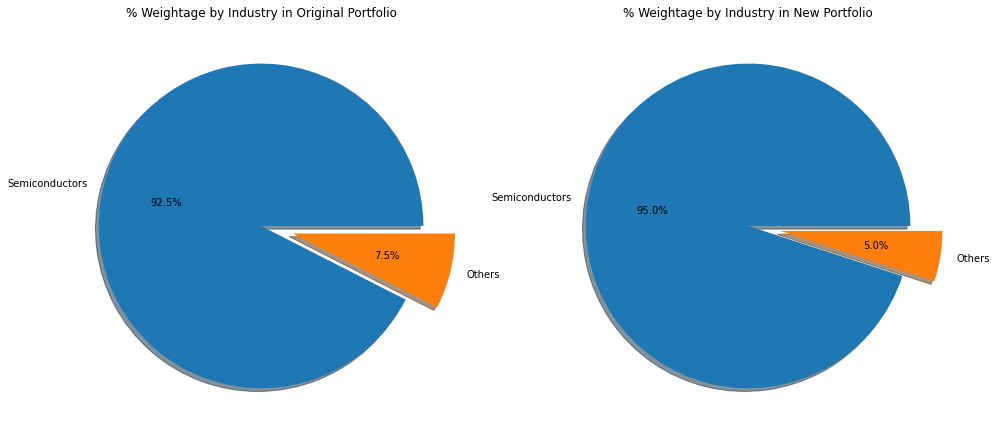

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.pie((orig_semiconductor_weight, 1-orig_semiconductor_weight), labels=('Semiconductors','Others'),
       autopct='%1.1f%%', explode = (0,0.2), shadow=True)
ax2.pie((new_semiconductor_weight, 1-new_semiconductor_weight), labels=('Semiconductors','Others'),
       autopct='%1.1f%%', explode = (0,0.2), shadow=True)
ax1.set_title("% Weightage by Industry in Original Portfolio")
ax2.set_title("% Weightage by Industry in New Portfolio")
plt.show()